In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', sep=',', encoding='latin-1')
df.head()

<ipython-input-2-af139f57e164>:1: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', sep=',', encoding='latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [3]:
# I want To analyze the following columns
df = df[['eventid','iyear','imonth','iday','country_txt','region_txt','attacktype1_txt','targtype1_txt',
        'gname','weaptype1_txt','dbsource']]

In [4]:
#shape of the dataset
df.shape

(11960, 11)

In [5]:
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Private Citizens & Property,MANO-D,Unknown,PGIS
1,197000000002,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,PGIS
2,197001000001,1970,1,0,Philippines,Southeast Asia,Assassination,Journalists & Media,Unknown,Unknown,PGIS
3,197001000002,1970,1,0,Greece,Western Europe,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,PGIS
4,197001000003,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,PGIS


In [6]:
#finding all null values in the columns
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
attacktype1_txt    0
targtype1_txt      0
gname              1
weaptype1_txt      1
dbsource           1
dtype: int64

In [7]:
#discription of dataset
df.describe()

,eventid,iyear,imonth,iday
count,1.196000e+04,11960.000000,11960.000000,11960.000000
mean,1.976790e+11,1976.726338,6.170569,15.243227
std,3.022204e+08,3.024931,3.338024,8.942614
min,1.970000e+11,1970.000000,0.000000,0.000000
25%,1.975050e+11,1975.000000,3.000000,8.000000
50%,1.978022e+11,1978.000000,6.000000,15.000000
75%,1.979073e+11,1979.000000,9.000000,23.000000
max,1.980093e+11,1980.000000,12.000000,31.000000


In [8]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   eventid          11960 non-null  int64 
 1   iyear            11960 non-null  int64 
 2   imonth           11960 non-null  int64 
 3   iday             11960 non-null  int64 
 4   country_txt      11960 non-null  object
 5   region_txt       11960 non-null  object
 6   attacktype1_txt  11960 non-null  object
 7   targtype1_txt    11960 non-null  object
 8   gname            11959 non-null  object
 9   weaptype1_txt    11959 non-null  object
 10  dbsource         11959 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


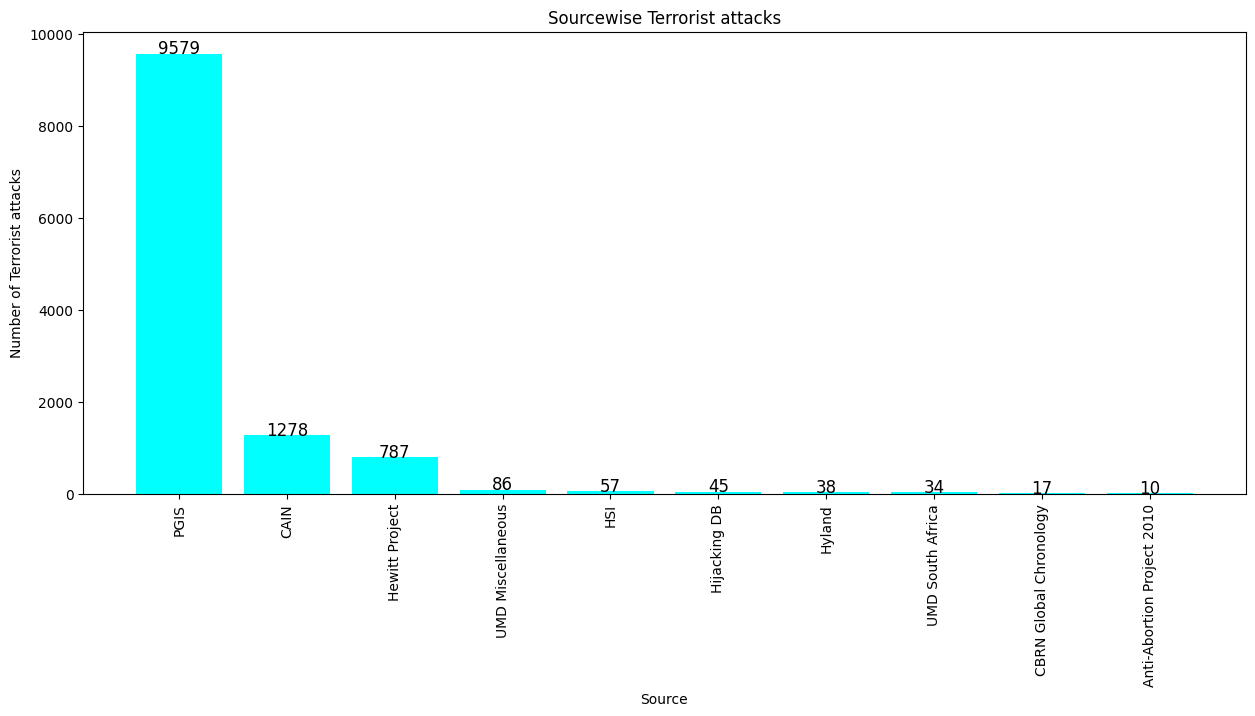

In [11]:
#sourcewise terrorist attack

plt.figure(figsize=(15,6))
plt.bar(df.dbsource.value_counts()[:10].index,df.dbsource.value_counts()[:10].values,color='cyan')
# set the axis labels and title
plt.xlabel('Source')
plt.ylabel('Number of Terrorist attacks')
plt.title('Sourcewise Terrorist attacks')
plt.xticks(rotation=90)
# # rotate the x-axis labels for better visibility
for i, v in enumerate(df.dbsource.value_counts()[:10].values):
    plt.text(df.dbsource.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')
# show the plot
plt.show()

In [12]:
# list of top 20 countries with Highest terrorism

df.country_txt.value_counts()[:20]

United Kingdom        1755
United States         1527
Italy                 1112
Spain                 1042
El Salvador            963
Turkey                 571
France                 552
Colombia               531
Guatemala              339
Argentina              334
Nicaragua              321
West Germany (FRG)     290
Israel                 261
Iran                   240
Philippines            174
Lebanon                162
Greece                 154
Mexico                 119
Chile                   92
Rhodesia                83
Name: country_txt, dtype: int64

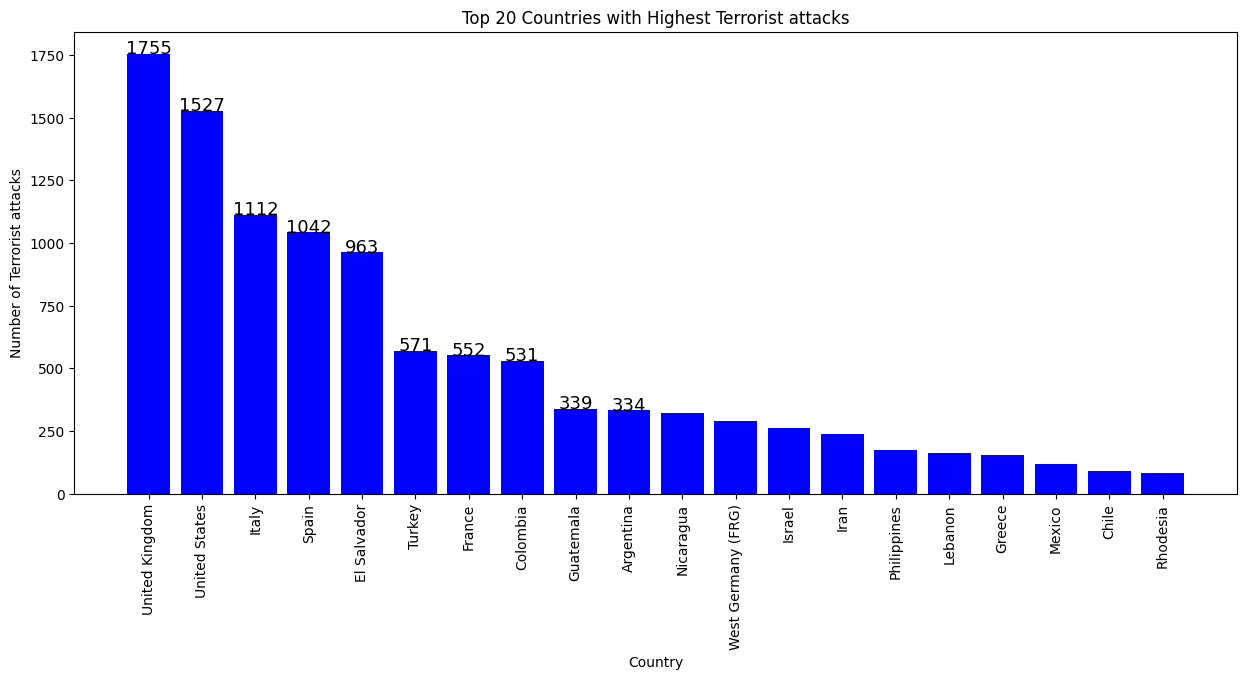

In [30]:
#plotting the top 20 countries with Highest Terrorist attacks

plt.figure(figsize=(15,6))
plt.bar(df.country_txt.value_counts()[:20].index,df.country_txt.value_counts()[:20].values,color='blue')
# set the axis labels and title
plt.xlabel('Country')
plt.ylabel('Number of Terrorist attacks')
plt.title('Top 20 Countries with Highest Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.country_txt.value_counts()[:10].values):
    plt.text(df.country_txt.value_counts()[:20].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [14]:
# Regions with Highest Terrorist Attacks

df.region_txt.value_counts()

Western Europe                 5163
Central America & Caribbean    1708
North America                  1655
Middle East & North Africa     1466
South America                  1229
Sub-Saharan Africa              286
Southeast Asia                  270
East Asia                        79
South Asia                       60
Eastern Europe                   27
Australasia & Oceania            17
Name: region_txt, dtype: int64

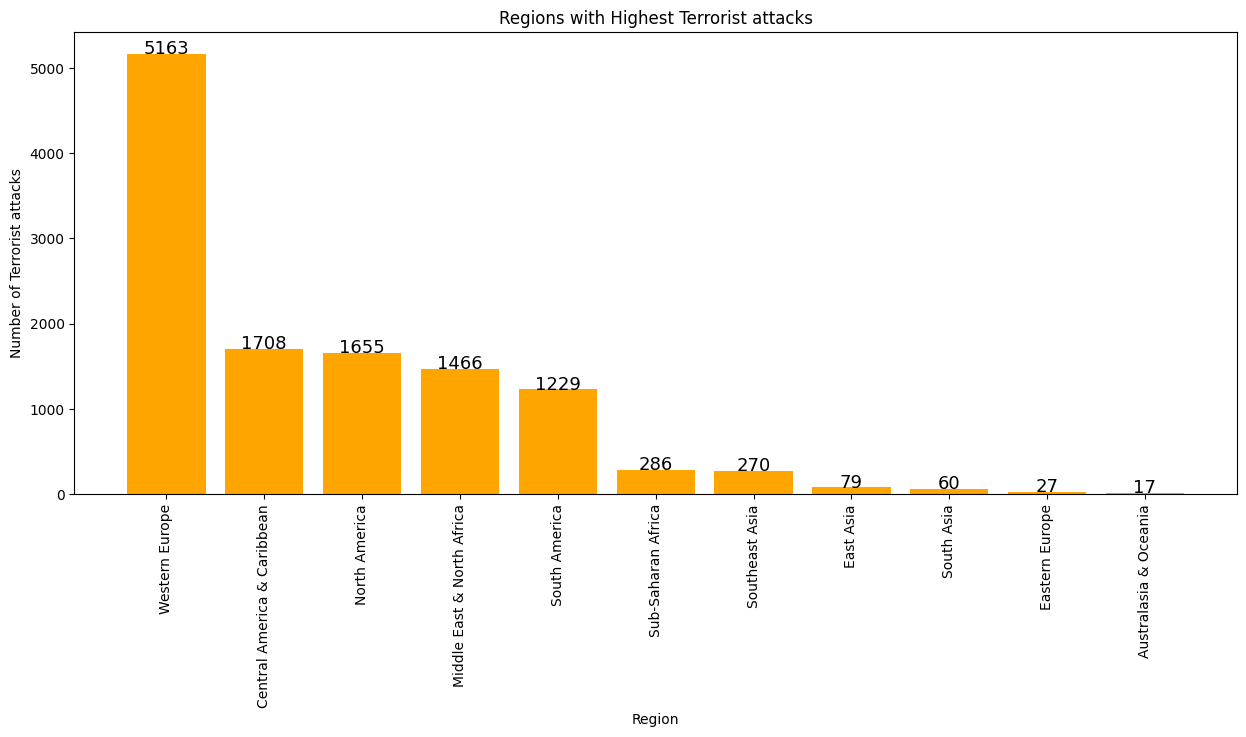

In [18]:
#Plotting the Region with Highest Terrorist Attacks

plt.figure(figsize=(15,6))
plt.bar(df.region_txt.value_counts().index,df.region_txt.value_counts().values,color='orange')
# set the axis labels and title
plt.xlabel('Region')
plt.ylabel('Number of Terrorist attacks')
plt.title('Regions with Highest Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.region_txt.value_counts().values):
    plt.text(df.region_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [19]:
# Common types of Terrorist Attacks
df.attacktype1_txt.value_counts()

Bombing/Explosion                      5084
Assassination                          2467
Armed Assault                          1879
Facility/Infrastructure Attack         1227
Hostage Taking (Kidnapping)             641
Unknown                                 354
Hostage Taking (Barricade Incident)     211
Hijacking                                70
Unarmed Assault                          27
Name: attacktype1_txt, dtype: int64

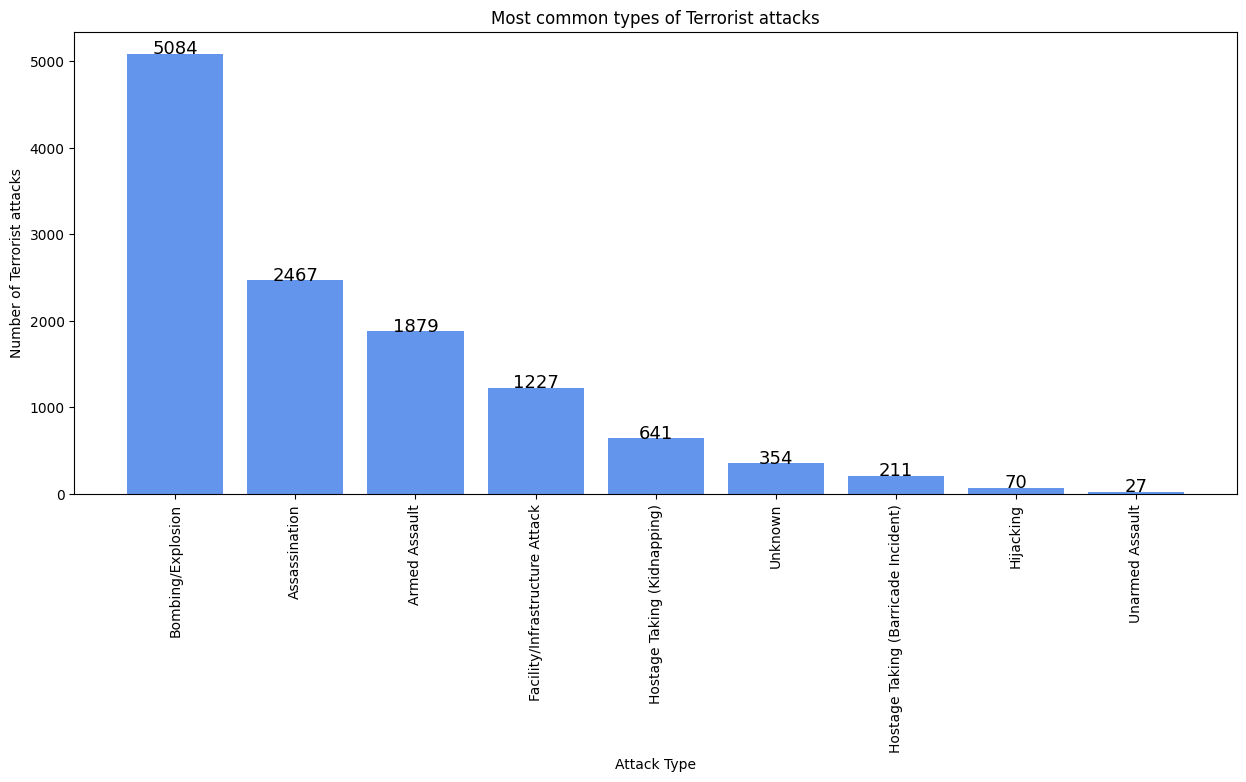

In [20]:
#Plotting the Common types of Terrorist Attacks

plt.figure(figsize=(15,6))
plt.bar(df.attacktype1_txt.value_counts().index,df.attacktype1_txt.value_counts().values,color='cornflowerblue')
# set the axis labels and title
plt.xlabel('Attack Type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most common types of Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.attacktype1_txt.value_counts().values):
    plt.text(df.attacktype1_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [21]:
# Most targeted Places for Terrorist Attacks
df.targtype1_txt.value_counts()

Business                          2904
Private Citizens & Property       1876
Government (General)              1580
Military                          1252
Police                            1216
Government (Diplomatic)            765
Journalists & Media                376
Educational Institution            363
Transportation                     339
Airports & Aircraft                337
Utilities                          205
Terrorists/Non-State Militia       154
Religious Figures/Institutions     148
Unknown                            136
Telecommunication                   80
Violent Political Party             69
NGO                                 45
Tourists                            44
Maritime                            28
Food or Water Supply                21
Abortion Related                    14
Other                                8
Name: targtype1_txt, dtype: int64

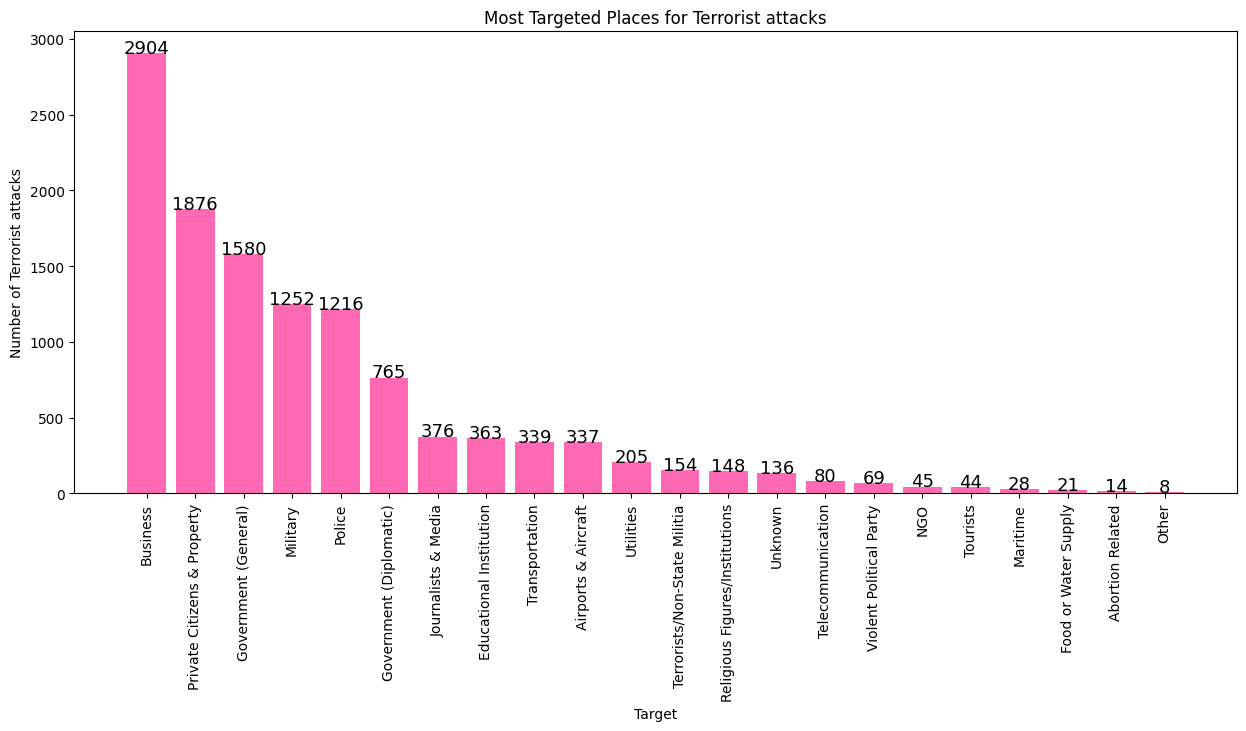

In [22]:
# Plotting the Most targeted Places for Terrorist Attacks

plt.figure(figsize=(15,6))
plt.bar(df.targtype1_txt.value_counts().index,df.targtype1_txt.value_counts().values,color='hotpink')
# set the axis labels and title
plt.xlabel('Target')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most Targeted Places for Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.targtype1_txt.value_counts().values):
    plt.text(df.targtype1_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [23]:
# Most terrorist attacks by top 20 different Groups
df.gname.value_counts()[:20]

Unknown                                                  3615
Irish Republican Army (IRA)                              1106
Basque Fatherland and Freedom (ETA)                       532
Palestinians                                              227
Protestant extremists                                     205
Sandinista National Liberation Front (FSLN)               197
Red Brigades                                              177
Ulster Volunteer Force (UVF)                              173
Left-Wing Militants                                       170
People's Liberation Forces (FPL)                          167
Corsican National Liberation Front (FLNC)                 156
Farabundo Marti National Liberation Front (FMLN)          144
Revolutionary Armed Forces of Colombia (FARC)             133
Black September                                           120
Montoneros (Argentina)                                    116
Fuerzas Armadas de Liberacion Nacional (FALN)             109
First of

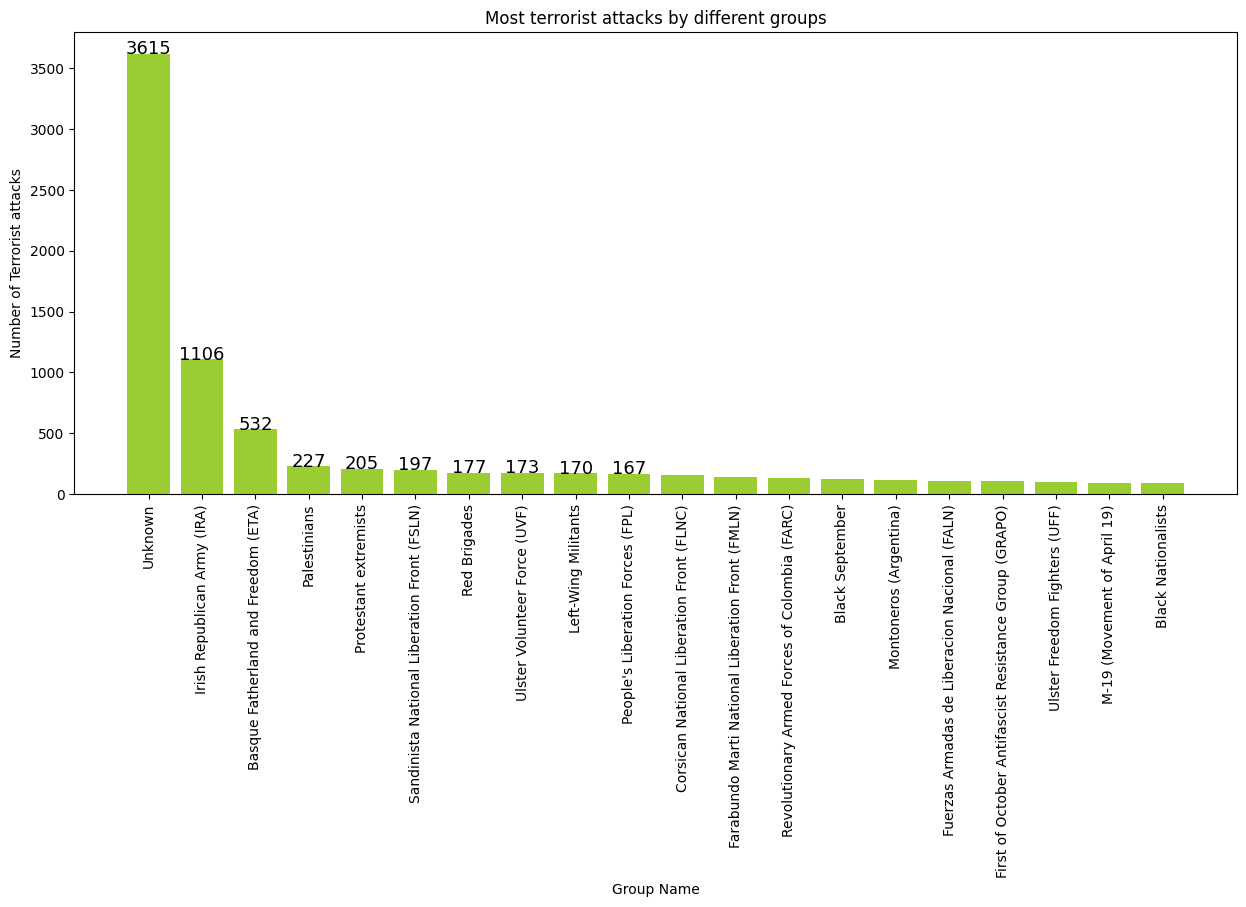

In [29]:
#Plotting the top 20 Most terrorist attacks by different Groups

plt.figure(figsize=(15,6))
plt.bar(df.gname.value_counts()[:20].index,df.gname.value_counts()[:20].values,color='yellowgreen')
# set the axis labels and title
plt.xlabel('Group Name')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most terrorist attacks by different groups')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.gname.value_counts()[:10].values):
    plt.text(df.gname.value_counts()[:20].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [26]:
# Top 11 weapons used in Terrorist Attacks
df.weaptype1_txt.value_counts()[:20]

Explosives                                                                     5239
Firearms                                                                       3876
Incendiary                                                                     1439
Unknown                                                                        1261
Melee                                                                            90
Chemical                                                                         35
Other                                                                             6
Sabotage Equipment                                                                5
Fake Weapons                                                                      4
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       2
Radiological                                                                      2
Name: weaptype1_txt, dtype: int64

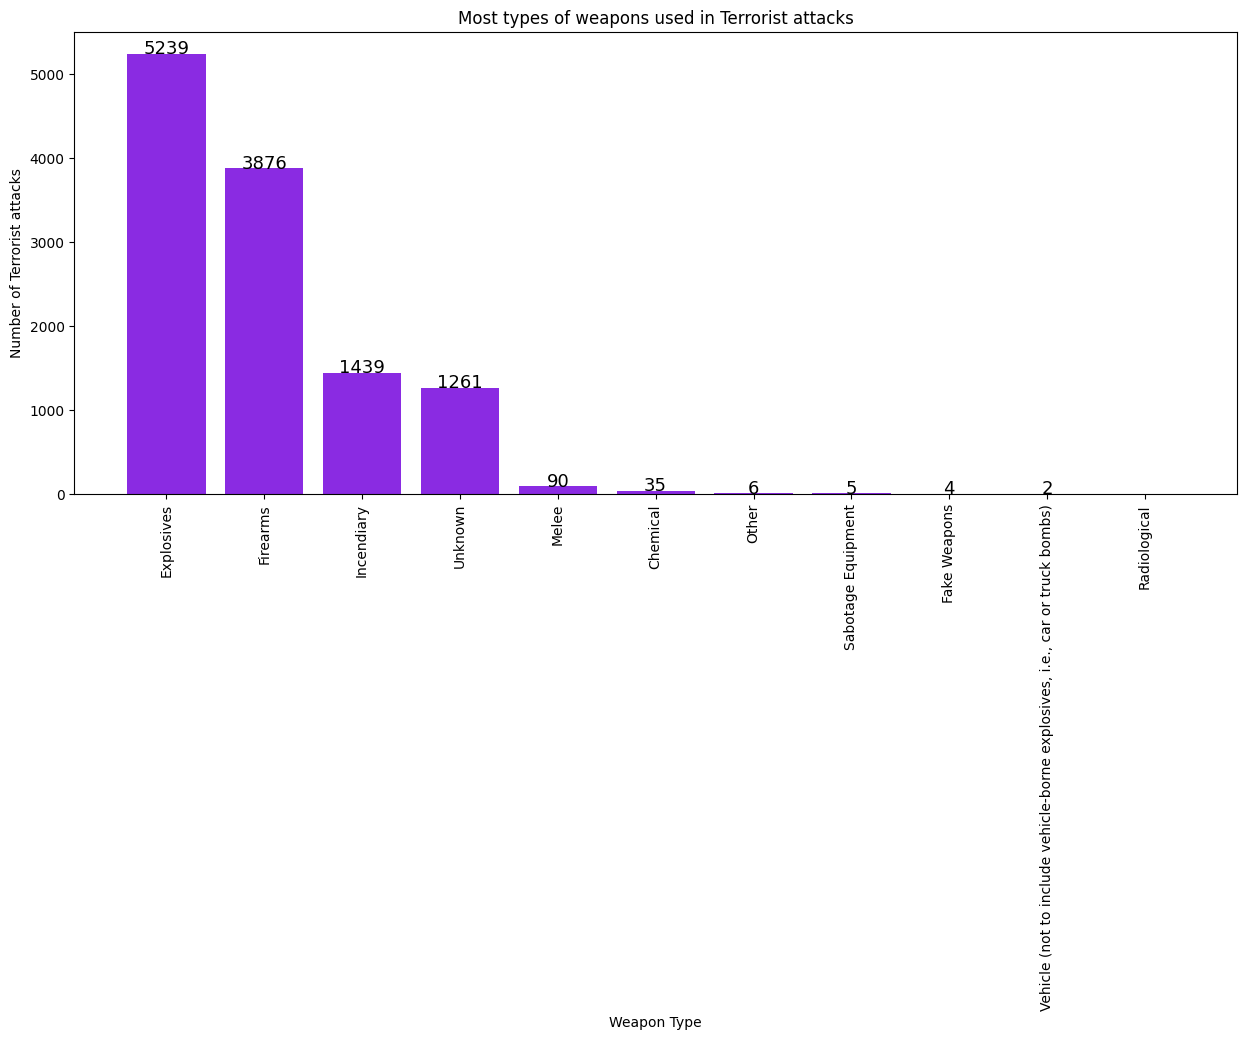

In [28]:
# Plotting the Top 11 weapons used in Terrorist Attacks

plt.figure(figsize=(15,6))
plt.bar(df.weaptype1_txt.value_counts()[:11].index,df.weaptype1_txt.value_counts()[:11].values,color='blueviolet')
# set the axis labels and title
plt.xlabel('Weapon Type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most types of weapons used in Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.weaptype1_txt.value_counts()[:10].values):
    plt.text(df.weaptype1_txt.value_counts()[:11].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [31]:
# Terrorism Attacks occured by each Year
highest_values = df.groupby(['iyear'])['eventid'].count()
highest_values

iyear
1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2046
Name: eventid, dtype: int64

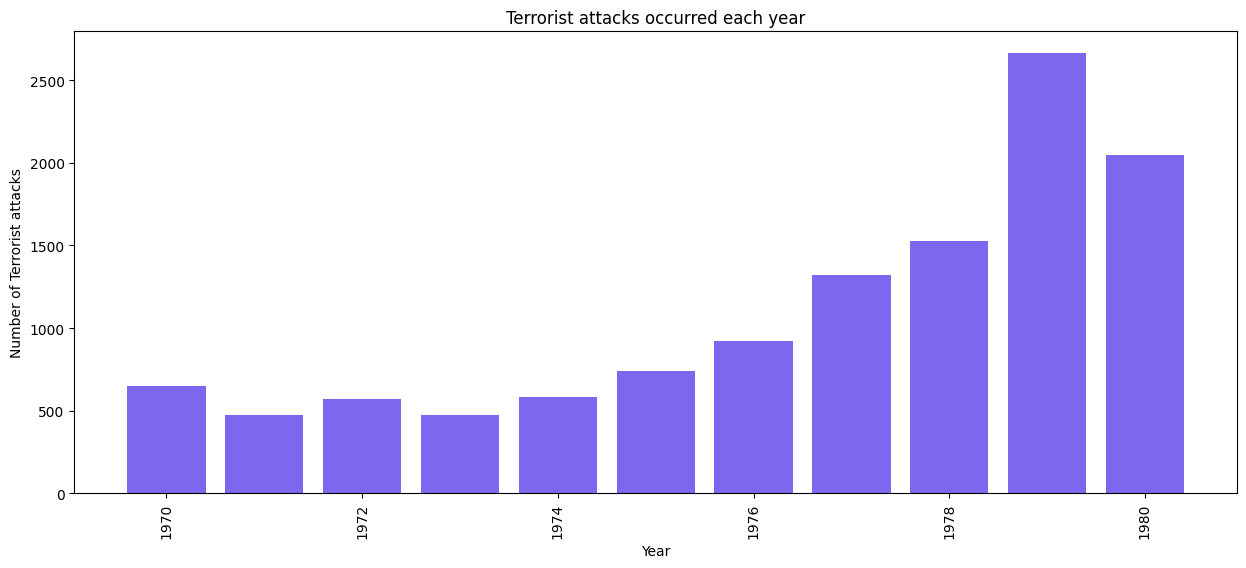

In [34]:
# Plotting Year vs Number of Terrorist Attacks

plt.figure(figsize=(15,6))
plt.bar(highest_values.index, highest_values.values,color='mediumslateblue')
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorist attacks')
plt.title('Terrorist attacks occurred each year')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(highest_values.values):
    if v > 10000:
        plt.text(highest_values.index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')
# show the plot
plt.show()

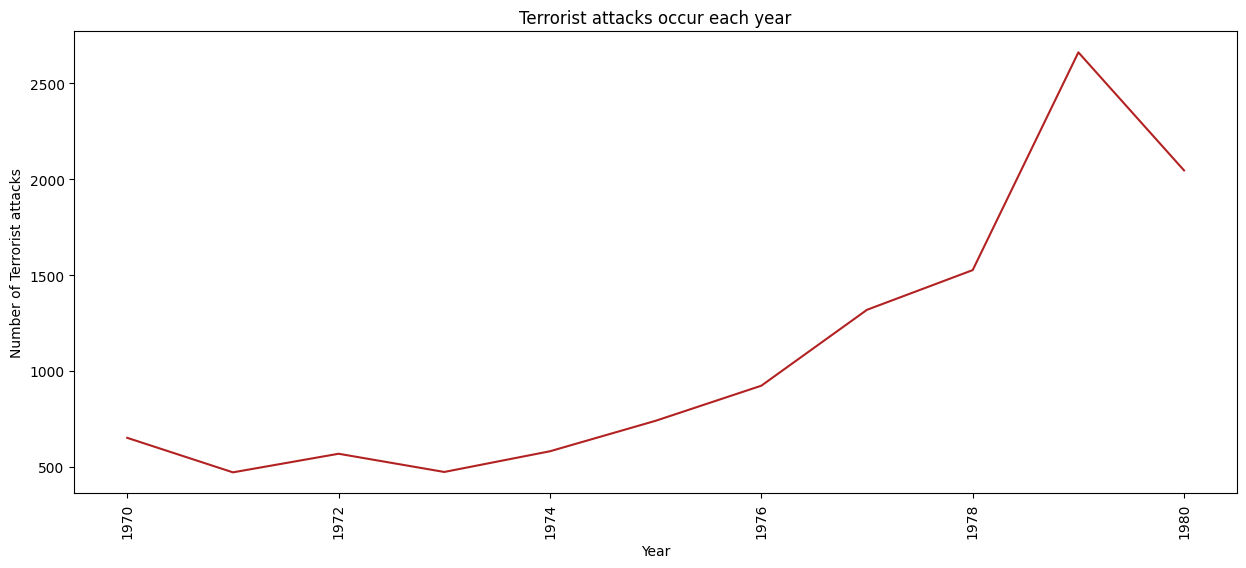

In [35]:
plt.figure(figsize=(15,6))
plt.plot(highest_values.index, highest_values.values, color="firebrick")
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorist attacks')
plt.title('Terrorist attacks occur each year')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(highest_values.values):
    if v > 10000:
        plt.text(highest_values.index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')

In [37]:
# Lets Compare Terrorism from India and Pakistan

In [39]:
# Terrorism from India

df_india = df[df.country_txt == 'India']
df_india.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
1186,197202220004,1972,2,22,India,South Asia,Hijacking,Airports & Aircraft,Palestinians,Explosives,Hijacking DB
2764,197501190004,1975,1,2,India,South Asia,Bombing/Explosion,Government (General),Ananda Marga,Explosives,UMD Encyclopedia of World Terrorism 2012
3857,197605260001,1976,5,26,India,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,PGIS
5327,197709280004,1977,9,28,India,South Asia,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Firearms,Hijacking DB
7337,197901130004,1979,1,13,India,South Asia,Armed Assault,Police,Naga People,Firearms,PGIS


In [40]:
# Terrorism from Pakistan
df_pakistan = df[df.country_txt == 'Pakistan']
df_pakistan.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
585,197011010001,1970,11,1,Pakistan,South Asia,Assassination,Government (Diplomatic),Unknown,Vehicle (not to include vehicle-borne explosiv...,PGIS
2217,197402020001,1974,2,2,Pakistan,South Asia,Bombing/Explosion,Maritime,Muslim Guerrillas,Firearms,PGIS
2705,197412090001,1974,12,9,Pakistan,South Asia,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,PGIS
2744,197500000001,1975,0,0,Pakistan,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,PGIS
2795,197502080001,1975,2,8,Pakistan,South Asia,Assassination,Government (General),National Awami Party,Firearms,PGIS


In [41]:
new_row = pd.DataFrame(data = {
    'country' : ['India','Pakistan','Other Countries'],
    'value' : [df_india.shape[0],df_pakistan.shape[0],df[(df.region_txt == 'South Asia') & (df.country_txt != 'India') & (df.country_txt != 'Pakistan')].shape[0]]
})
new_row = new_row.set_index('country')
new_row

,value
country,
India,31
Pakistan,18
Other Countries,11


<Axes: ylabel='value'>

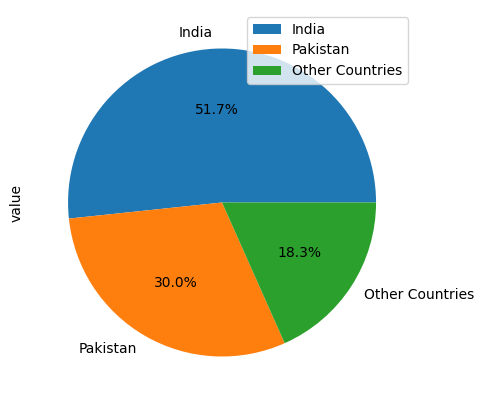

In [42]:
# PiePlotting

new_row.plot.pie(y='value', figsize=(5, 5),legend = 'country', autopct='%1.1f%%')

In [43]:
# More than 80% Terrorist Attacks from South Asia is from India and Pakistan

In [44]:
# Year wise Terrorism attack from India
india_year_wise_values = df_india.groupby(['iyear'])['eventid'].count()
india_year_wise_values

iyear
1972     1
1975     1
1976     1
1977     1
1979    20
1980     7
Name: eventid, dtype: int64

In [45]:
# Year wise Terrorism attack from Pakistan
pakistan_year_wise_values = df_pakistan.groupby(['iyear'])['eventid'].count()
pakistan_year_wise_values

iyear
1970    1
1974    2
1975    2
1976    3
1978    2
1979    7
1980    1
Name: eventid, dtype: int64

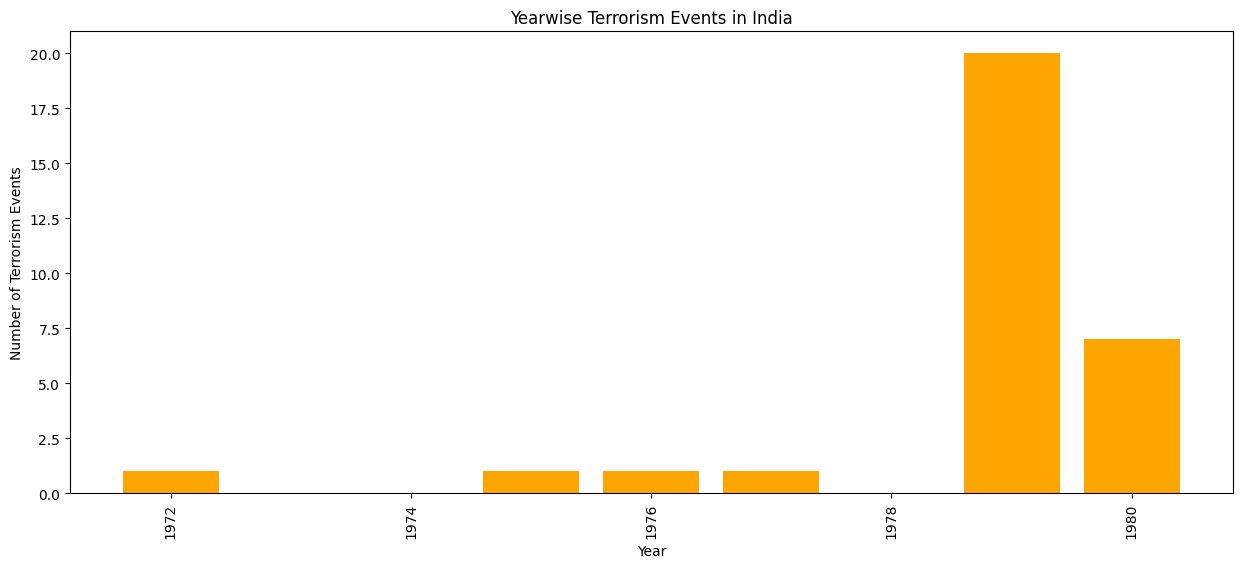

In [46]:
# Plotting the Year wise Terrorism attack from India

plt.figure(figsize=(15,6))
plt.bar(india_year_wise_values.index, india_year_wise_values.values,color='orange')
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in India')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(india_year_wise_values.values):
    if v > 650:
        plt.text(india_year_wise_values.index[i], v+0.5, str(round(v,2)), fontsize=15, color='black', ha='center')
# show the plot
plt.show()

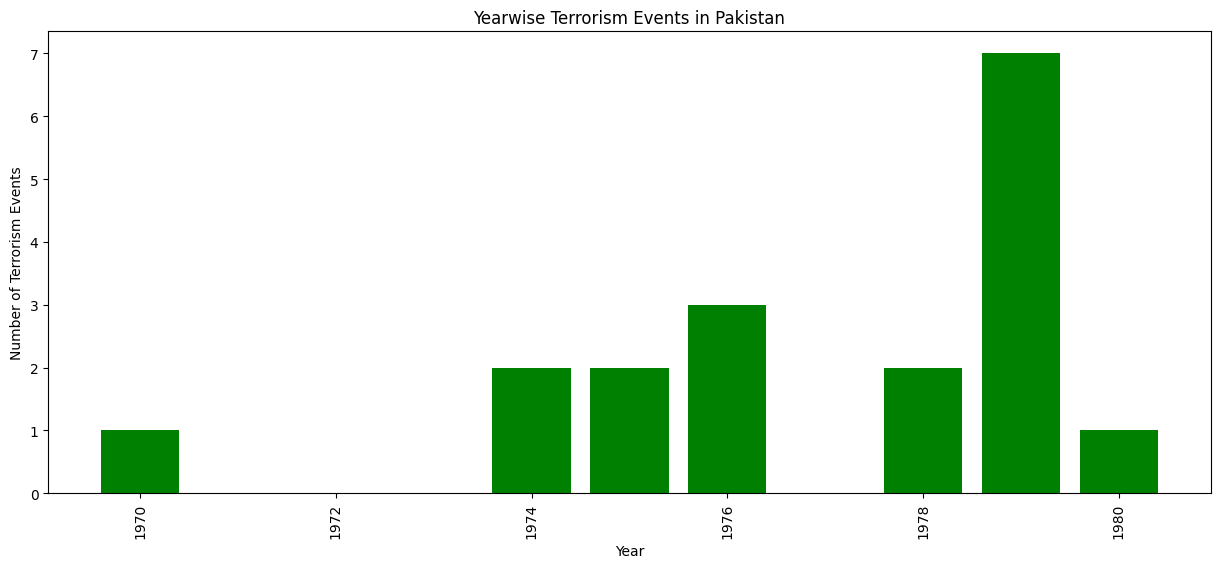

In [47]:
# Plotting the Year wise Terrorism attack from Pakistan

plt.figure(figsize=(15,6))
plt.bar(pakistan_year_wise_values.index, pakistan_year_wise_values.values,color='g')
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in Pakistan')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(pakistan_year_wise_values.values):
    if v > 650:
        plt.text(pakistan_year_wise_values.index[i], v+0.5, str(round(v,2)), fontsize=15, color='black', ha='center')
# show the plot
plt.show()

In [48]:
df_india_pakistan = pd.DataFrame({'India': india_year_wise_values, 'Pakistan': pakistan_year_wise_values})
df_india_pakistan.head()

,India,Pakistan
iyear,,
1970,NaN,1.0
1972,1.0,NaN
1974,NaN,2.0
1975,1.0,2.0
1976,1.0,3.0


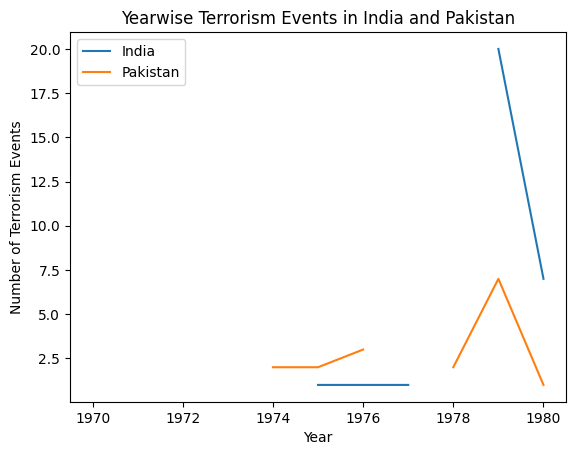

In [49]:
# Comparing yearwise Terrorism attacks in India and Pakistan

df_india_pakistan.plot()
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in India and Pakistan')
plt.legend()
plt.show()